In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [23]:

# Separate target from features
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']


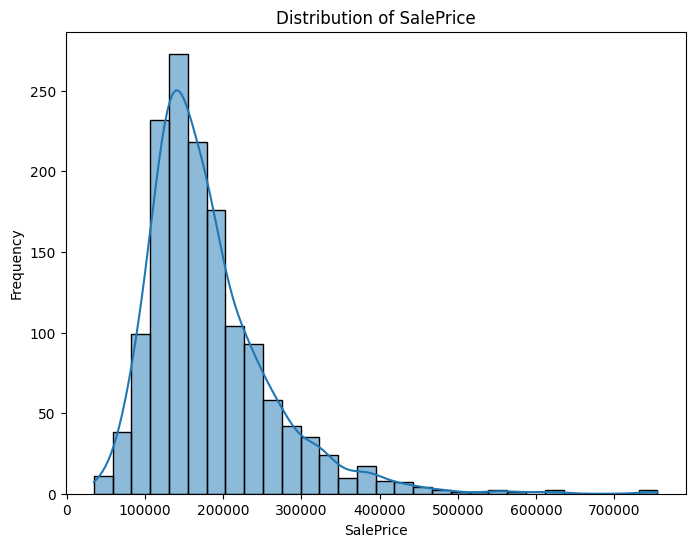

In [24]:
# Data Visualization
# 1. Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


/var/folders/r7/_qf_l8597dx_rlldg3l3l2_40000gn/T/ipykernel_6033/622529374.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


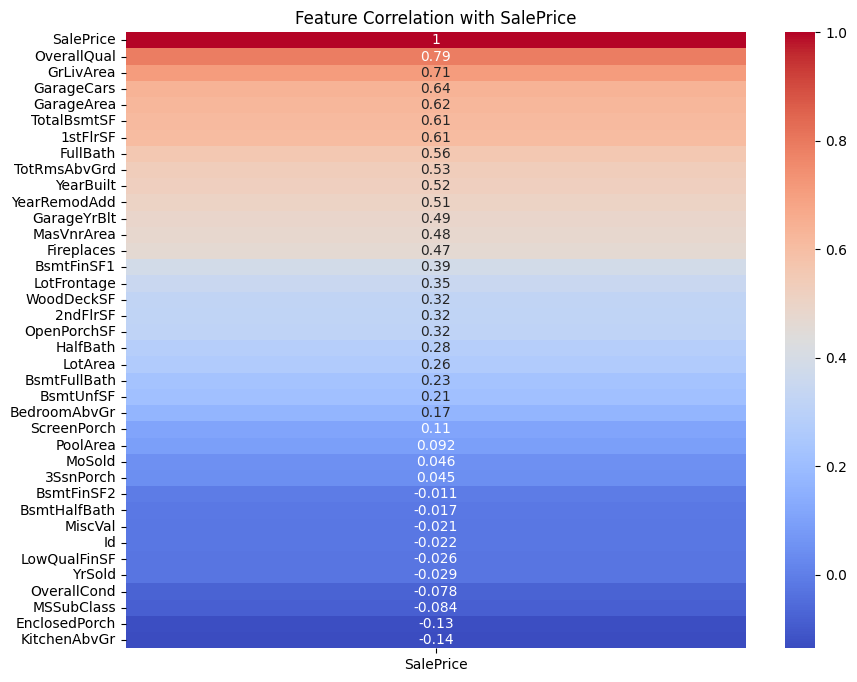

In [25]:
# 2. Correlation heatmap (simple)
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with SalePrice')
plt.show()


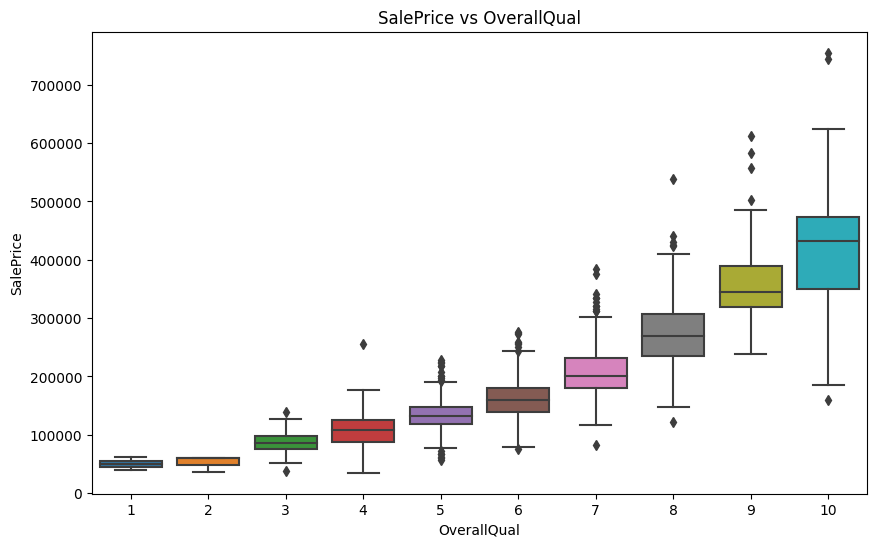

In [26]:
# 3. Boxplot for OverallQual vs. SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


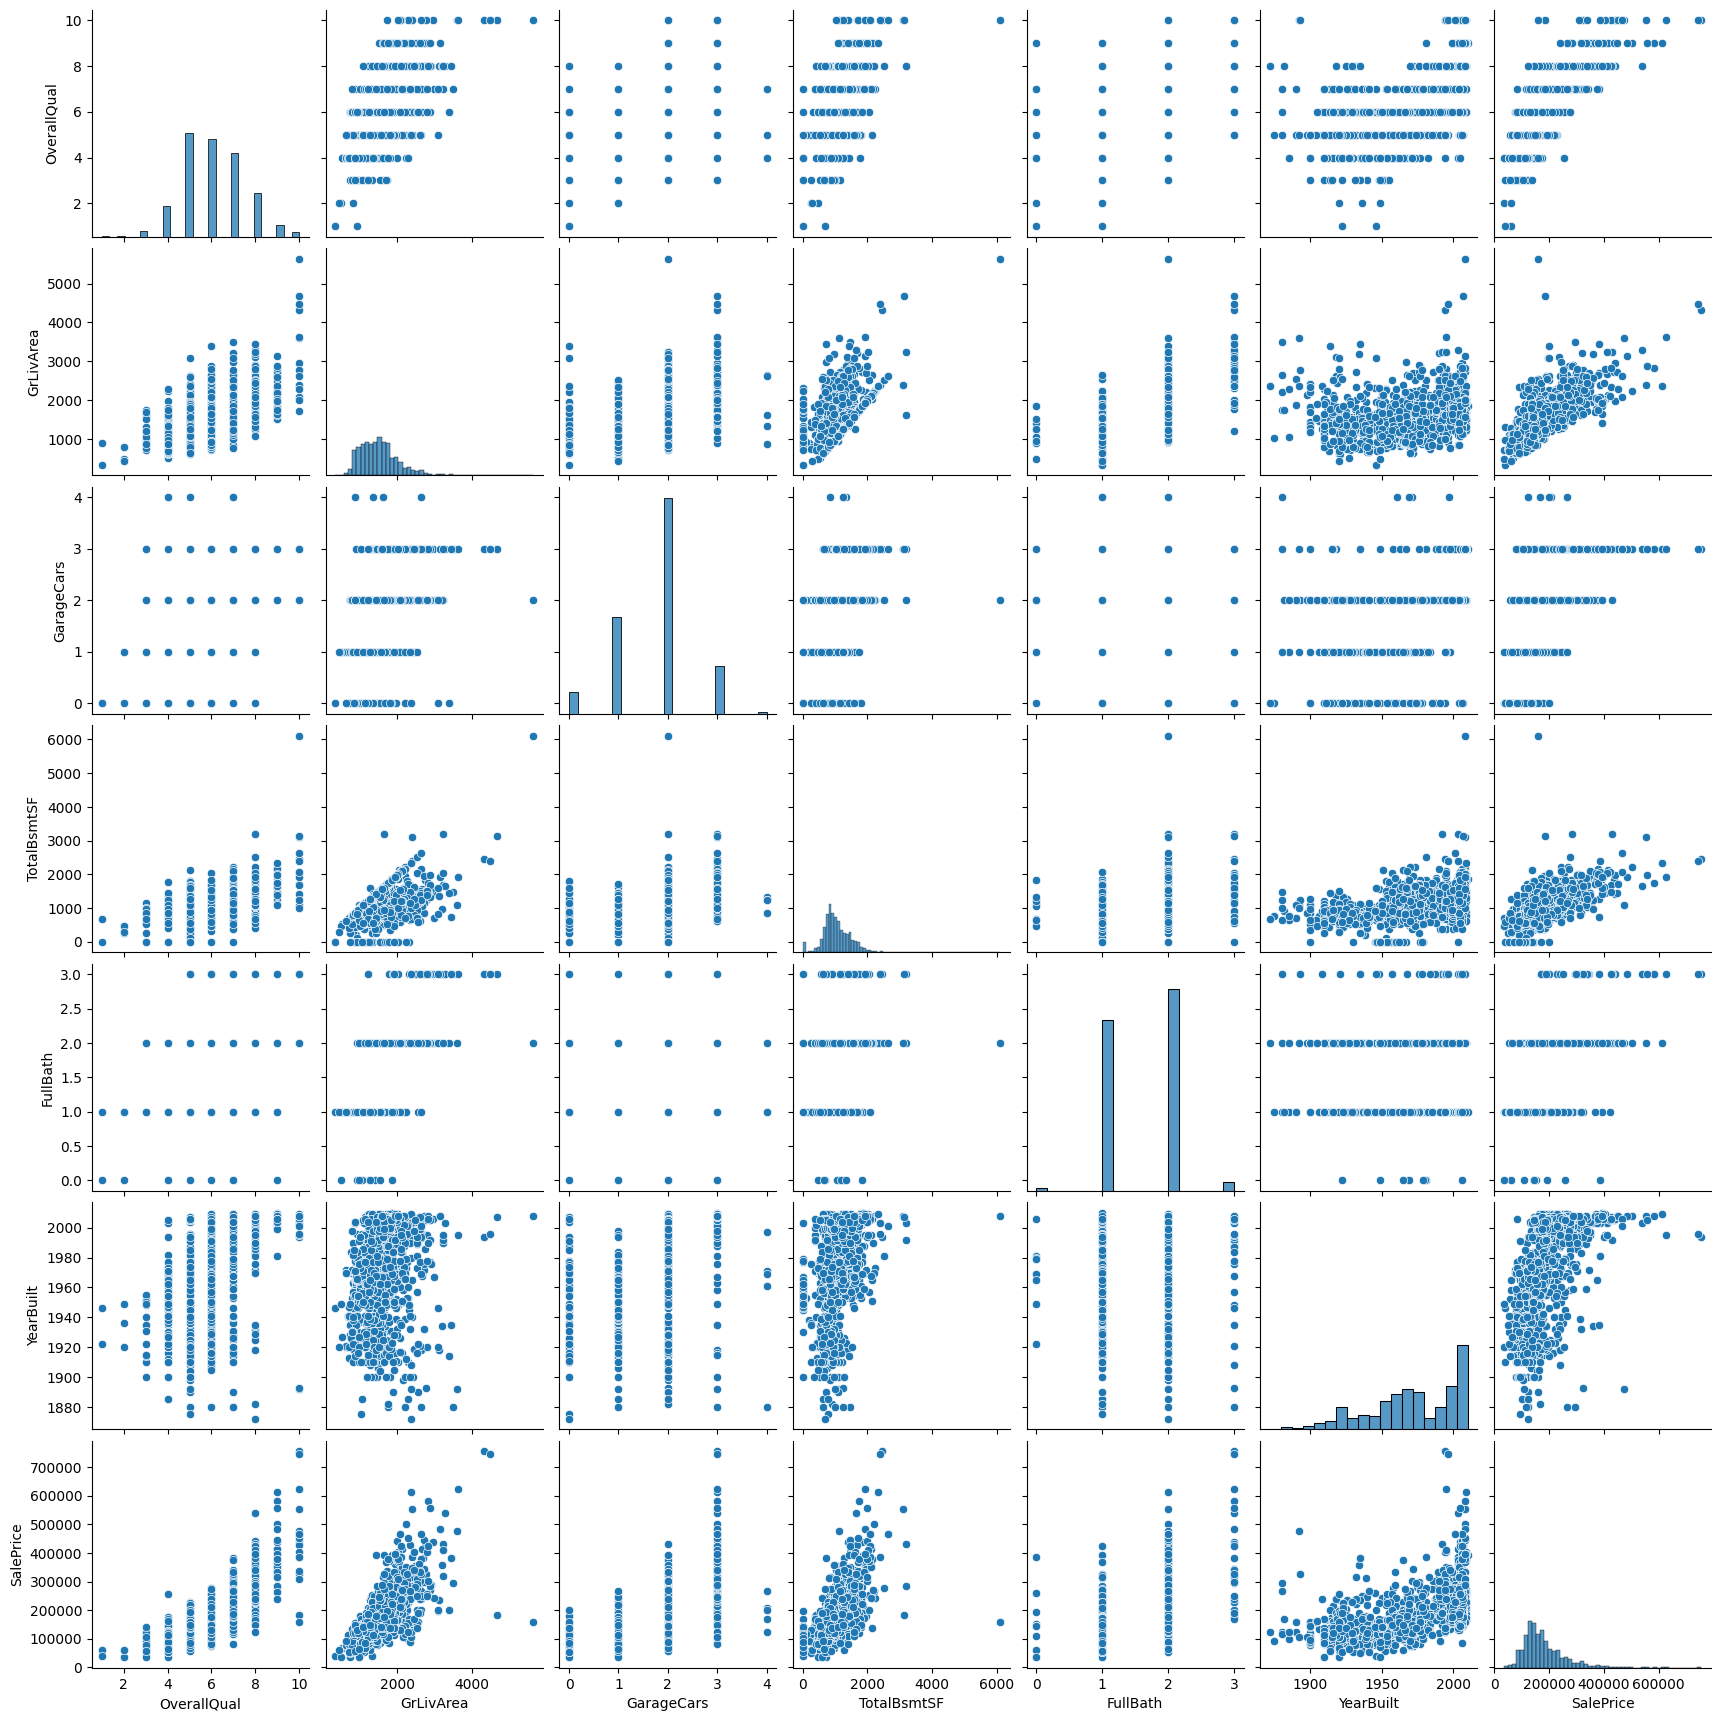

In [27]:
# 4. Pairplot of some important features
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[important_features + ['SalePrice']])
plt.show()


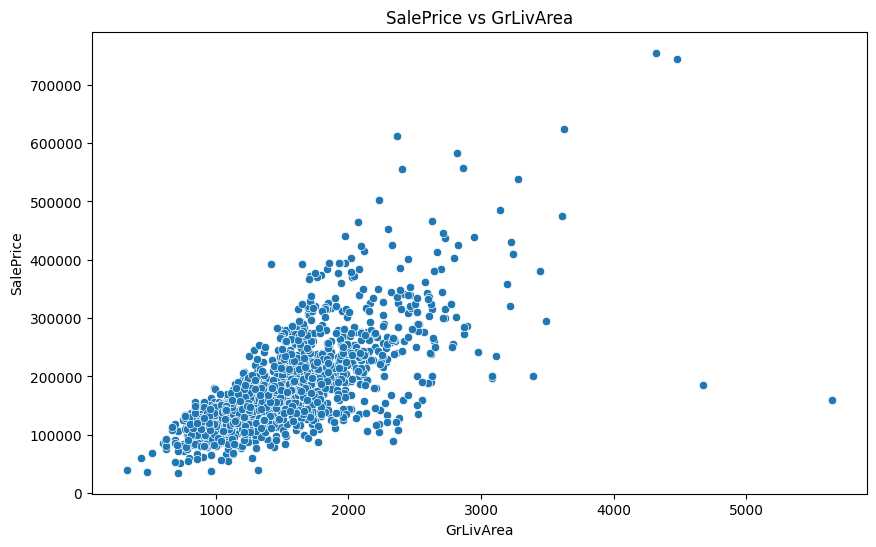

In [28]:
# 5. Scatterplot for GrLivArea vs. SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [29]:
# Preprocessing for numerical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [30]:
# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [31]:
# Apply transformations to the data
X_preprocessed = preprocessor.fit_transform(X)
test_preprocessed = preprocessor.transform(test_df)


In [32]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [33]:
# Train a simple model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)
accuracy = r2 * 100

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Model Accuracy: {accuracy:.2f}%')

Root Mean Squared Error: 29536.15
Model Accuracy: 88.63%


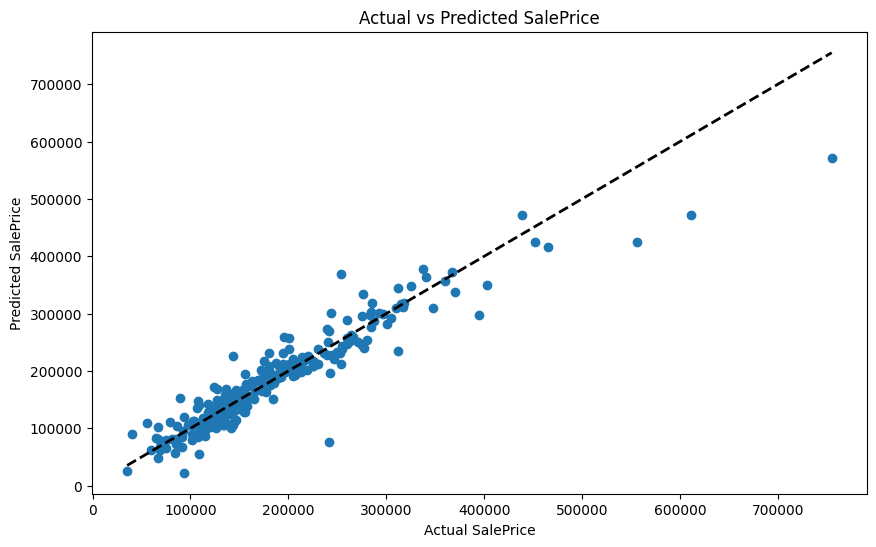

In [35]:
# Visualizing the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()